# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : IF1-Folium
- Anggota : </br>
10122005 - Zulfi Fadilah Azhar</br>
10122029 - Alif Vidya Kusumah</br>
10122034 - Dawla Izza Al-Din Noor</br>
10122018 - Mutiara Fatiha</br>
10121033 - M.Irsyad.Hasbadi </br>

## Menentukan Pertanyaan Bisnis

**Pertanyaan 1**<br/>
Bagaimana aktivitas transaksi di berbagai state? Lalu bagaimana distribusi pelanggan dari state yang memiliki aktivitas transaksi terbanyak? (**10122005 - Zulfi Fadilah Azhar**)

**Pertanyaan 2**<br/>
Berapa persentase pengiriman yang terjadi keterlambatan dari semua pengiriman yang berhasil diterima? dan apa hubungan dari keterlambatan pengiriman tersebut dengan review yang diberikan oleh pelanggan? (**10122034 - Dawla Izza Al-Din Noor**)

**Pertanyaan 3**<br/>
Produk apa aja yang paling banyak dibeli? (**10122018 - Mutiara Fatiha**)

**Pertanyaan 4**<br/>
Apakah terdapat hubungan antara berat produk dengan keterlambatan pengiriman? (**10122029 - Alif Vidya Kusumah**)

**Pertanyaan 5**<br>
Metode Pembayaran Apa Yang Paling Sering Digunakan Dan Menampilkan Jumlah Transaksi Paling Besar Disetiap Metode Transaksinya serta mengecek apakah ada data transaksi yang tidak sesuai format / gagal
**(10121033-M.Irsyad.Hasbadi)**

## Inisialisasi url dataset

In [ ]:
customers_dataset = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/customers_dataset.csv"
geolocation_dataset = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/geolocation_dataset.csv"
order_items_dataset = "https://github.com/ZulfiFazhar/Dicoding-Wrangling-Data/raw/main/dataset/order_items_dataset.csv"
order_payments_dataset = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/order_payments_dataset.csv"
order_reviews_dataset = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/order_reviews_dataset.csv"
orders_dataset = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/orders_dataset.csv"
product_category_name_translation = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/product_category_name_translation.csv"
products_dataset = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/products_dataset.csv"
sellers_dataset = "https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/sellers_dataset.csv"

## Menyiapkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from wordcloud import WordCloud

## Data Wrangling

contoh memanggil dataset menggunakan link yang sudah di sediakan diatas


```
# contoh ingin import customers_dataset
customers_df = pd.read_csv(customers_dataset)
customers_df
```



Memanggil Data Untuk Pertanyaan 5

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/order_payments_dataset.csv")
data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### Gathering Data

**Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.**

Load Customers Dataset

In [ ]:
customers_df = pd.read_csv(customers_dataset)
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Load Geolocation Dataset

In [ ]:
geolocation_df = pd.read_csv(geolocation_dataset)
geolocation_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


Load Orders Dataset

In [ ]:
orders_df = pd.read_csv(orders_dataset)
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


Load Order Reviews Dataset

In [ ]:
reviews_df = pd.read_csv(order_reviews_dataset)
reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


Load Datase Order_Payment

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ZulfiFazhar/Dicoding-Wrangling-Data/main/dataset/order_payments_dataset.csv")
print(data)

                                order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8 

Load Products Dataset

In [ ]:
products_df = pd.read_csv(products_dataset)
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


Load Order Items Dataset

In [ ]:
order_items_df = pd.read_csv(order_items_dataset)
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Load Category Translation Dataset

In [ ]:
category_translation_df = pd.read_csv(product_category_name_translation)
category_translation_df.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


### Assessing Data

**Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.**

Customers

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
print(f'Jumlah duplikasi data : {customers_df.duplicated().sum()}')

Jumlah duplikasi data : 0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Geolocation

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
print(f'Jumlah duplikasi data : {geolocation_df.duplicated().sum()}')

Jumlah duplikasi data : 261831


In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Orders

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print(f'Jumlah duplikasi data : {orders_df.duplicated().sum()}')

Jumlah duplikasi data : 0


Order Reviews

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
print(f'Jumlah duplikasi data : {reviews_df.duplicated().sum()}')

Jumlah duplikasi data : 0


Order_Payment

Informasi Umum Tentang Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Melihat Statistik Deskriptip Dataset

In [ ]:
data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Melihat Dan Mencari Missing Value

In [ ]:
  data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Melihat Sampel Data

In [ ]:
data.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Identifikasi value yang tidak memenuhi standar

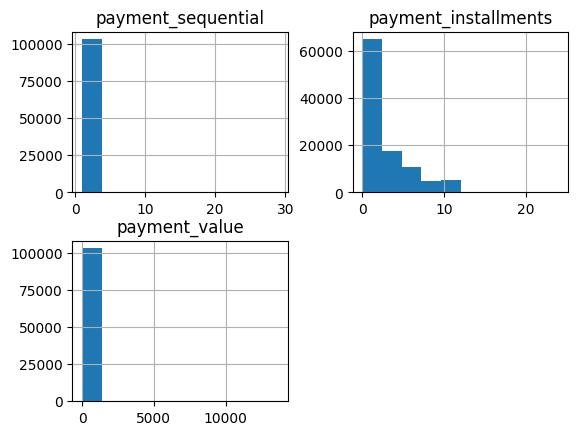

In [ ]:
data.hist()
plt.show()

Products

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
print(f'Jumlah duplikasi data: {products_df.duplicated().sum()}')

Jumlah duplikasi data: 0


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Order Items

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
print(f'Jumlah duplikasi data: {order_items_df.duplicated().sum()}')

Jumlah duplikasi data: 0


In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Product Category Translation

In [ ]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
category_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
print(f'Jumlah duplikasi data: {category_translation_df.duplicated().sum()}')

Jumlah duplikasi data: 0


### Cleaning Data

**Apabila pada proses sebelumnya kita menemukan masalah (missing value, duplicate, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data.**

#### Duplicate Data

Geolocation

In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print(f'Jumlah duplikasi data : {geolocation_df.duplicated().sum()}')

Jumlah duplikasi data : 0


Order Payment

In [ ]:
data.drop_duplicates(inplace=True)
print(f'Jumlah Duplikasi Data : {data.duplicated().sum()}')

Jumlah Duplikasi Data : 0


#### Missing Value

Orders

In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Kolom-kolom yang mempunyai *missing value* adalah kolom yang *value* nya bisa tidak bernilai dengan suatu kondisi tertentu.
- Kolom order_approved_at *value*-nya bisa tidak bernilai apabila order belum di *approved* oleh penjual.
- Kolom delivered_carrier_date *value*-nya bisa tidak bernilai apabila barang yang diorder belum diterima oleh jasa pengantar.
- Kolom delivered_customer_date *value*-nya bisa tidak bernilai apabila barang yang diorder belum diterima oleh pelanggan.

Sehingga tidak perlu dilakukan operasi untuk mengolah *missing value* tersebut.

Reviews

In [ ]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Kolom-kolom yang mempunyai *missing value* adalah kolom yang *value*-nya bersifat opsional atau nilainya boleh diisi ataupun kosong:
- Kolom review_comment_title *value*-nya bisa kosong apabila pelanggan tidak memberikan judul komen review pembelian.
- Kolom review_comment_message *value*-nya bisa kosong apabila pelanggan tidak memberikan pesan komen review pembelian.

Sehingga tidak perlu dilakukan operasi untuk mengolah *missing value* tersebut.

Order_Payment

In [ ]:
data.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Products

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df.dropna(subset=['product_category_name'], axis=0, inplace=True)
products_df.reset_index(drop=True, inplace=True)
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32336,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32337,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32338,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32339,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [ ]:
products_df.dropna(subset=['product_weight_g'], axis=0, inplace=True)
products_df.reset_index(drop=True, inplace=True)
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Inacurate Value

Orders

In [ ]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Mengubah tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrer_date, dan order_estimated_delivery_date menjadi datetime64[ns].

In [ ]:
orders_df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders_df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].astype('datetime64[ns]')
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Reviews

In [ ]:
reviews_df.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Mengubah tipe data kolom review_creation_date dan review_answer_timestamp menjadi datetime64[ns].

In [ ]:
reviews_df[['review_creation_date','review_answer_timestamp']] = reviews_df[['review_creation_date','review_answer_timestamp']].astype('datetime64[ns]')
reviews_df.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

Order_Payment

In [ ]:
data.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

## Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA) merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis.**

### Eksplorasi data untuk pertanyaan 1

Menggabungkan dataset customers dan geolocation karena memiliki relasi di atribut zip_code_prefix dan membuat tabel baru untuk memudahkan proses visualisasi data

In [ ]:
cust_loc_df = pd.merge(customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
cust_loc_df = cust_loc_df.rename(columns={'customer_zip_code_prefix' : 'cust_loc_prefix'}).drop(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'], axis=1)
cust_loc_df


,customer_id,customer_unique_id,cust_loc_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194
...,...,...,...,...,...,...,...
10328001,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.598092,-46.904582
10328002,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594171,-46.908091
10328003,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.599369,-46.905603
10328004,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.584425,-46.892014


In [ ]:
cust_missing = cust_loc_df[cust_loc_df.isna().any(axis=1)]
display(cust_missing)

,customer_id,customer_unique_id,cust_loc_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
36723,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,NaN,NaN
40906,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,NaN,NaN
92552,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,NaN,NaN
127988,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,NaN,NaN
133316,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,NaN,NaN
...,...,...,...,...,...,...,...
10128747,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,brasilia,DF,NaN,NaN
10159596,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,paragominas,PA,NaN,NaN
10194587,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,sao sebastiao do paraiba,RJ,NaN,NaN
10271129,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,siriji,PE,NaN,NaN


In [ ]:
cust_loc_df = cust_loc_df.dropna()
cust_loc_df.isna().sum()

customer_id           0
customer_unique_id    0
cust_loc_prefix       0
customer_city         0
customer_state        0
geolocation_lat       0
geolocation_lng       0
dtype: int64

In [ ]:
state_count = cust_loc_df['customer_state'].value_counts().reset_index()
state_count.columns = ['state', 'count']
display(state_count)

,state,count
0,SP,3878927
1,MG,2224871
2,RJ,1630246
3,RS,599746
4,PR,453088
5,SC,392072
6,BA,258631
7,ES,204715
8,GO,98518
9,MT,93267


### Eksplorasi data untuk pertanyaan 2

Menyaring data untuk yang order statusnya sudah diterima oleh pelanggan saja dan membuang kolom yang tidak diperlukan untuk pengolahan ini, kemudian memasukannya ke dataframe baru untuk memudahkan pengolahan data.

In [ ]:
delivered_orders_df = orders_df[orders_df['order_status'] == 'delivered'].copy().drop(['customer_id','order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date'],axis=1)
delivered_orders_df.head()

,order_id,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,2018-02-26


Menghitung perbedaan waktu dari estimasi lama pengiriman (order_estimated_delivery_date) dengan waktu pengiriman sampai tujuan sebenarnya (order_delivered_customer_date) dalam satuan hari.

In [ ]:
delivered_orders_df['delivery_delay'] = (delivered_orders_df['order_delivered_customer_date'] - delivered_orders_df['order_estimated_delivery_date']).dt.days
delivered_orders_df.head()

,order_id,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,2017-10-18,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,2018-08-13,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,2018-09-04,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,2017-12-15,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,2018-02-26,-10.0


Memberikan keterangan untuk setiap data pembelian tentang status keterlambatan pengiriman pembelian tersebut.

In [ ]:
delivered_orders_df['delivered_late'] = delivered_orders_df['delivery_delay'] > 0
delivered_orders_df.head(20)

,order_id,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,delivered_late
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,2017-10-18,-8.0,False
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,2018-08-13,-6.0,False
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,2018-09-04,-18.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,2017-12-15,-13.0,False
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,2018-02-26,-10.0,False
5,a4591c265e18cb1dcee52889e2d8acc3,2017-07-26 10:57:55,2017-08-01,-6.0,False
7,6514b8ad8028c9f2cc2374ded245783f,2017-05-26 12:55:51,2017-06-07,-12.0,False
8,76c6e866289321a7c93b82b54852dc33,2017-02-02 14:08:10,2017-03-06,-32.0,False
9,e69bfb5eb88e0ed6a785585b27e16dbf,2017-08-16 17:14:30,2017-08-23,-7.0,False
10,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-29 11:18:31,2017-06-07,-9.0,False


Menghitung persentase pembelian yang terjadi keterlambatan pengiriman dan yang tidak terjadi keterlambatan pengiriman dari semua pembelian yang sudah berhasil sampai tujuan.

In [ ]:
delivery_late_sum = len(delivered_orders_df[delivered_orders_df['delivered_late']])
delivery_late_percentage = (delivery_late_sum / len(delivered_orders_df)) * 100
delivery_notLate_percentage = 100 - delivery_late_percentage
print(f'Persentase pembelian yang terjadi keterlambatan adalah       : {delivery_late_percentage:.2f} %')
print(f'Persentase pembelian yang tidak terjadi keterlambatan adalah : {delivery_notLate_percentage:.2f} %')

Persentase pembelian yang terjadi keterlambatan adalah       : 6.77 %
Persentase pembelian yang tidak terjadi keterlambatan adalah : 93.23 %


Melakukan merge data dengan data reviews untuk melihat hubungan keterlambatan pengiriman dengan review yang diberikan oleh pelanggan.

In [ ]:
merged_order_review_df = pd.merge(delivered_orders_df, reviews_df, on='order_id', how='inner').drop(['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'],axis=1)
merged_order_review_df.head()

,order_id,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,delivered_late,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-10 21:25:13,2017-10-18,-8.0,False,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-07 15:27:45,2018-08-13,-6.0,False,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-17 18:06:29,2018-09-04,-18.0,False,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-02 00:28:42,2017-12-15,-13.0,False,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-16 18:17:02,2018-02-26,-10.0,False,e50934924e227544ba8246aeb3770dd4,5


In [ ]:
merged_order_review_df.to_csv('izza-order_review_late.csv', index=False)

Menghitung rata-rata skor review dari pembelian yang terjadi keterlambatan dengan yang tidak terjadi keterlambatan.

In [ ]:
late_score_mean = merged_order_review_df[merged_order_review_df['delivered_late']]['review_score'].mean()
not_late_score_mean = merged_order_review_df[merged_order_review_df['delivered_late'] == False]['review_score'].mean()
print(f'Rata-rata review skor pembelian yang terjadi keterlambatan pengiriman       : {late_score_mean:.2f}')
print(f'Rata-rata review skor pembelian yang tidak terjadi keterlambatan pengiriman : {not_late_score_mean:.2f}')

Rata-rata review skor pembelian yang terjadi keterlambatan pengiriman       : 2.27
Rata-rata review skor pembelian yang tidak terjadi keterlambatan pengiriman : 4.29


### Eksplorasi Data Untuk Pertanyaan 3:

Merge data products, order_items, dan category_translation

In [ ]:
cat_order_df = pd.merge(pd.merge(products_df, order_items_df, on='product_id'), category_translation_df, on='product_category_name').copy()
cat_order_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,perfumery


Membuang kolom data yang tidak diperlukan

In [ ]:
cat_order_df = cat_order_df.drop(['product_name_lenght', 'product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','seller_id','shipping_limit_date','price','freight_value'], axis=1)
cat_order_df.head()

,product_id,product_category_name,order_id,order_item_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,048cc42e03ca8d43c729adf6962cb348,1,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,5fa78e91b5cb84b6a8ccc42733f95742,1,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,7b13c77c64a9a956500cbf1a9a23798d,1,perfumery


Membuat ranking dari category product berdasarkan jumlah pembelian

In [ ]:
cat_rank = cat_order_df['product_category_name_english'].value_counts()
cat_rank[0]

11115

### Eksplorasi Data Untuk Pertanyaan 4:

Merge data products, orders, dan order_items, dan membuang kolom yang tidak diperlukan.

In [ ]:
prod_ords_df = pd.merge(pd.merge(orders_df, order_items_df, on='order_id'), products_df, on='product_id').copy().drop(['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','seller_id','shipping_limit_date','price','freight_value','product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_length_cm','product_height_cm','product_width_cm'],axis=1)
prod_ords_df.head()

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,500.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,500.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,500.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,400.0


Membuang data yang order statusnya selain delivered.

In [ ]:
prod_ords_df = prod_ords_df[prod_ords_df['order_status'] == 'delivered']
prod_ords_df.head()

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,500.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,500.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,500.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,400.0


Menghitung lama pengiriman.

In [ ]:
prod_ords_df['delivery_delay'] = (prod_ords_df['order_delivered_customer_date'] - prod_ords_df['order_estimated_delivery_date']).dt.days
prod_ords_df.head()

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_weight_g,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0,-8.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,500.0,-10.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,500.0,-8.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,500.0,-6.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,400.0,-6.0


Menandakan pengiriman yang terlambat.

In [ ]:
prod_ords_df['late_delivered'] = (prod_ords_df['delivery_delay'] > 0)
prod_ords_df.head()

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,product_weight_g,delivery_delay,late_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,500.0,-8.0,False
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,500.0,-10.0,False
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,500.0,-8.0,False
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,500.0,-6.0,False
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,400.0,-6.0,False


Menghitung rata-rata berat produk yang mengalami keterlambatan pengiriman.

In [ ]:
prod_ords_df.to_csv('alif-prod_ords_df.csv', index=False)

In [ ]:
weight_late_delivered_mean = prod_ords_df[prod_ords_df['late_delivered'] == True]['product_weight_g'].mean()
print(f'Rata-rata berat produk yang mengalami keterlambatan pengiriman : {weight_late_delivered_mean:.2f}')

Rata-rata berat produk yang mengalami keterlambatan pengiriman : 2471.68


Menghitung rata-rata berat produk yang tidak mengalami keterlambatan pengiriman.

In [ ]:
weight_notlate_delivered_mean = prod_ords_df[prod_ords_df['late_delivered'] == False]['product_weight_g'].mean()
print(f'Rata-rata berat produk yang tidak mengalami keterlambatan pengiriman : {weight_notlate_delivered_mean:.2f}')

Rata-rata berat produk yang tidak mengalami keterlambatan pengiriman : 2069.27


### Eksplorasi Data Untuk Pertanyaan 5:

Menyaring Kolom Yang Perlukan Dan Membuang Yang Tidak di Perlukan

In [ ]:
data = data.drop(['order_id','payment_sequential'],axis=1)
data

,payment_type,payment_installments,payment_value
0,credit_card,8,99.33
1,credit_card,1,24.39
2,credit_card,1,65.71
3,credit_card,8,107.78
4,credit_card,2,128.45
...,...,...,...
103881,boleto,1,363.31
103882,credit_card,2,96.80
103883,credit_card,1,47.77
103884,credit_card,5,369.54


Menjumlahkan Masing Masing Payment type Yang telah Dilakukan

In [ ]:
payment_type_counts = data['payment_type'].value_counts()
print(payment_type_counts)

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


Menampilkan Payment_Value Terbesar Yang Pernah Dilakukan

In [ ]:
max_payment_per_type = data.groupby('payment_type')['payment_value'].max()

print("Nilai pembayaran tertinggi dari masing-masing payment_type:")
print(max_payment_per_type)

Nilai pembayaran tertinggi dari masing-masing payment_type:
payment_type
boleto          7274.88
credit_card    13664.08
debit_card      4445.50
not_defined        0.00
voucher         3184.34
Name: payment_value, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana aktivitas pembelian di berbagai state? Lalu bagaimana distribusi pelanggan dari state yang memiliki aktivitas pembelian terbanyak? (**10122005 - Zulfi Fadilah Azhar**)

In [ ]:
state_count.to_csv('zulfi-state_count.csv', index=False)

<ipython-input-83-193997aa7197>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='state', data=state_count, palette='viridis')


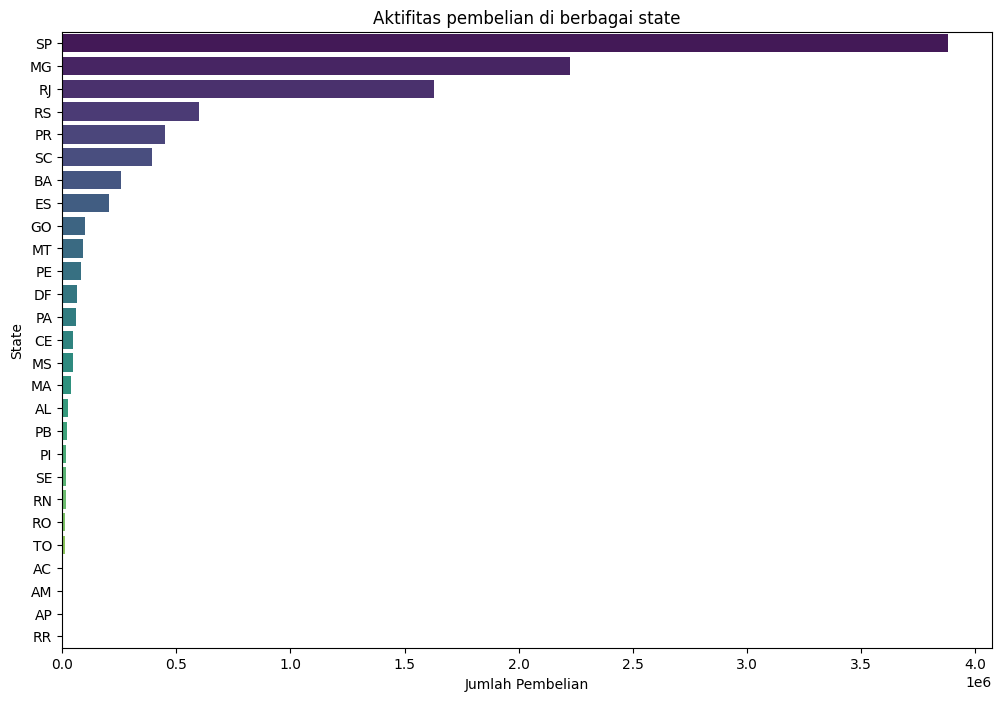

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='state', data=state_count, palette='viridis')

plt.xlabel('Jumlah Pembelian')
plt.ylabel('State')
plt.title('Aktifitas pembelian di berbagai state')

plt.show()

Karena state **SP (State of São Paulo)** merupakan state dengan jumlah customer terbanyak, maka akan dibuat filter berdasarkan data tersebut

In [ ]:
cust_state_sp = cust_loc_df[cust_loc_df['customer_state'] == 'SP']
cust_state_sp

,customer_id,customer_unique_id,cust_loc_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194
...,...,...,...,...,...,...,...
10328001,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.598092,-46.904582
10328002,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594171,-46.908091
10328003,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.599369,-46.905603
10328004,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.584425,-46.892014


In [ ]:
data = cust_state_sp[['geolocation_lat', 'geolocation_lng']].values.tolist()

In [ ]:
data = cust_state_sp[['geolocation_lat', 'geolocation_lng']]

In [ ]:
display(data)

,geolocation_lat,geolocation_lng
0,-20.509897,-47.397866
1,-20.497396,-47.399241
2,-20.510459,-47.399553
3,-20.480940,-47.394161
4,-20.515413,-47.398194
...,...,...
10328001,-23.598092,-46.904582
10328002,-23.594171,-46.908091
10328003,-23.599369,-46.905603
10328004,-23.584425,-46.892014


In [ ]:
map_center = [-22.373645561654335, -48.94204981239112]
m = folium.Map(location=map_center, zoom_start=8)
HeatMap(data).add_to(m)

In [ ]:
print("Jika ingin melihat hasil visualisasi yang lebih interaktif, jalankan program ini")
# hapus komentar code dibawah ini
# ↓
# m

Jika ingin melihat hasil visualisasi yang lebih interaktif, jalankan program ini


note : untuk mengurangi ukuran file yang terlalu besar, saya melakukan visualisasi di vscode dahulu, lalu screenshot dan memasukan hasil visualisasinya disini.

<div style="display: flex;">
    <img src="https://github.com/ZulfiFazhar/Dicoding-Wrangling-Data/blob/main/img/SP-Map.jpeg?raw=true" alt="Sao Paulo Map">
    <img src="https://github.com/ZulfiFazhar/Dicoding-Wrangling-Data/blob/main/img/SP-Heatmap.jpeg?raw=true" alt="Sao Paulo HeatMap">
</div>

In [ ]:
cust_city_sp = cust_state_sp['customer_city'].value_counts()
cust_city_sp.head(10)

sao paulo                762024
santos                   134971
campinas                 125935
santo andre              115599
sao bernardo do campo     94044
guarulhos                 79698
sao jose dos campos       78494
jundiai                   74314
ribeirao preto            65141
sorocaba                  62513
Name: customer_city, dtype: int64

In [ ]:
customer_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cust_city_sp)

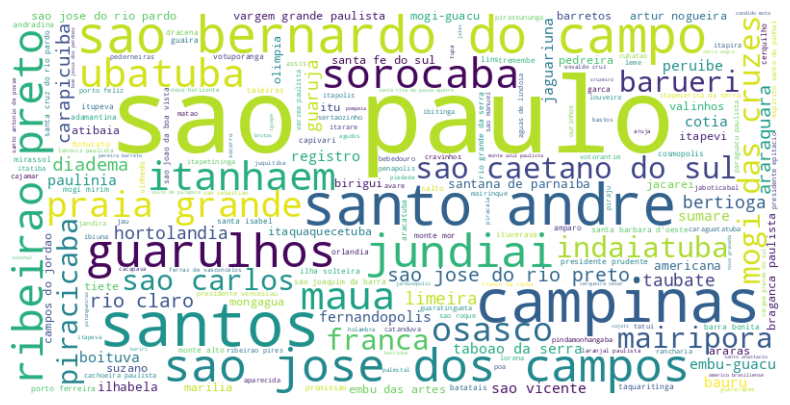

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(customer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Pertanyaan 2: Berapa persentase pengiriman yang terjadi keterlambatan dari semua pengiriman yang berhasil diterima? dan apa hubungan dari keterlambatan pengiriman tersebut dengan review yang diberikan oleh pelanggan?

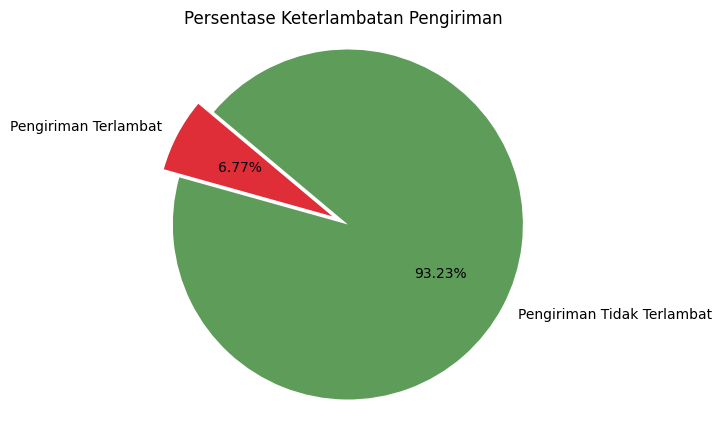

In [ ]:
plt.figure(figsize=(5,5))
pie_sizes = [delivery_late_percentage, delivery_notLate_percentage]
pie_labels = ['Pengiriman Terlambat', 'Pengiriman Tidak Terlambat']
plt.pie(pie_sizes, explode=(0.1,0), labels = pie_labels, colors=['#DF2E38','#5D9C59'], autopct='%1.2f%%', startangle=140)
plt.title('Persentase Keterlambatan Pengiriman')
plt.axis('equal')
plt.show()

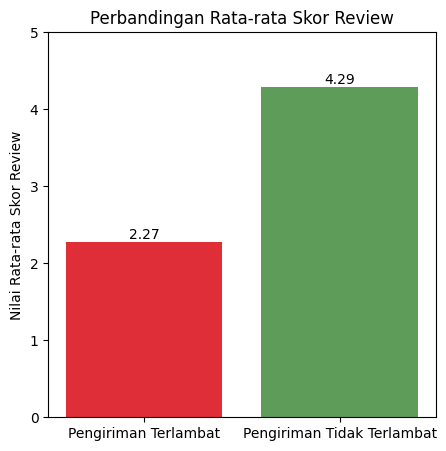

In [ ]:
plt.figure(figsize=(5,5))
bar_heights = [late_score_mean, not_late_score_mean]
bar_labels = ['Pengiriman Terlambat', 'Pengiriman Tidak Terlambat']
bars = plt.bar(bar_labels, bar_heights, color=['#DF2E38','#5D9C59'])
plt.title('Perbandingan Rata-rata Skor Review')
plt.ylabel('Nilai Rata-rata Skor Review')
plt.ylim(0,5)

for bar, height in zip(bars, bar_heights):
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

Melihat penyebaran nilai skor review yang diberikan oleh pelanggan yang mengalami keterlambatan pengiriman.

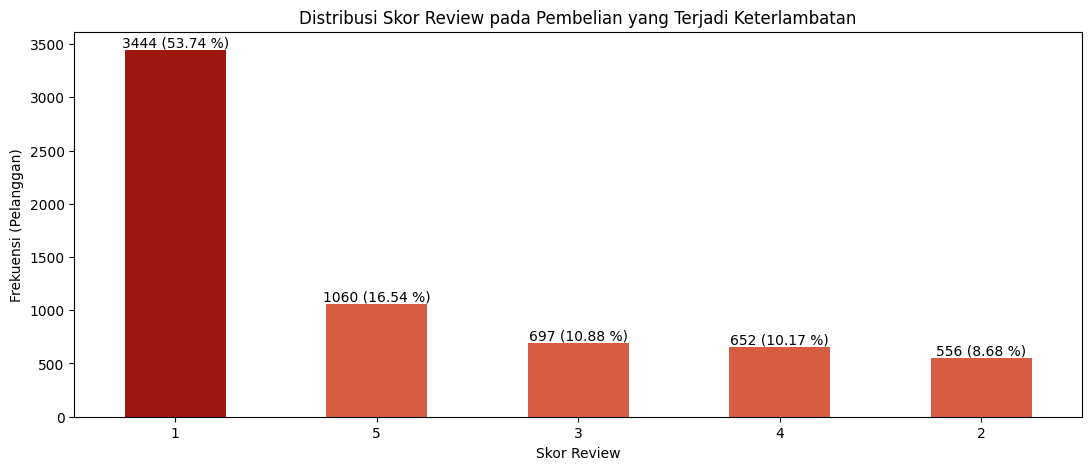

In [ ]:
plt.figure(figsize=(13,5))
review_counts = merged_order_review_df[merged_order_review_df['delivered_late']]['review_score'].value_counts()
total_review = review_counts.sum()
review_counts.plot(kind='bar',color=['#9E1711','#D65D42','#D65D42','#D65D42','#D65D42'])
plt.title('Distribusi Skor Review pada Pembelian yang Terjadi Keterlambatan')
plt.ylabel('Frekuensi (Pelanggan)')
plt.xlabel('Skor Review')
plt.xticks(rotation=0)

for i, val in enumerate(review_counts):
    percentage = (val / total_review) * 100
    plt.text(i, val + 1, f'{val} ({percentage:.2f} %)', ha='center', va='bottom')

plt.show()

### Pertanyaan 3: Kategori produk apa saja yang paling banyak dibeli?

In [ ]:
cat_rank.to_csv('mutiara-cat_rank.csv', index=True)

In [ ]:
cat_rank_df = cat_rank.to_frame()
cat_rank_df.reset_index(inplace=True)
new_column_names = {'index': 'kategori'}
cat_rank_df.rename(columns=new_column_names, inplace=True)
cat_rank_df.head()

,kategori,product_category_name_english
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


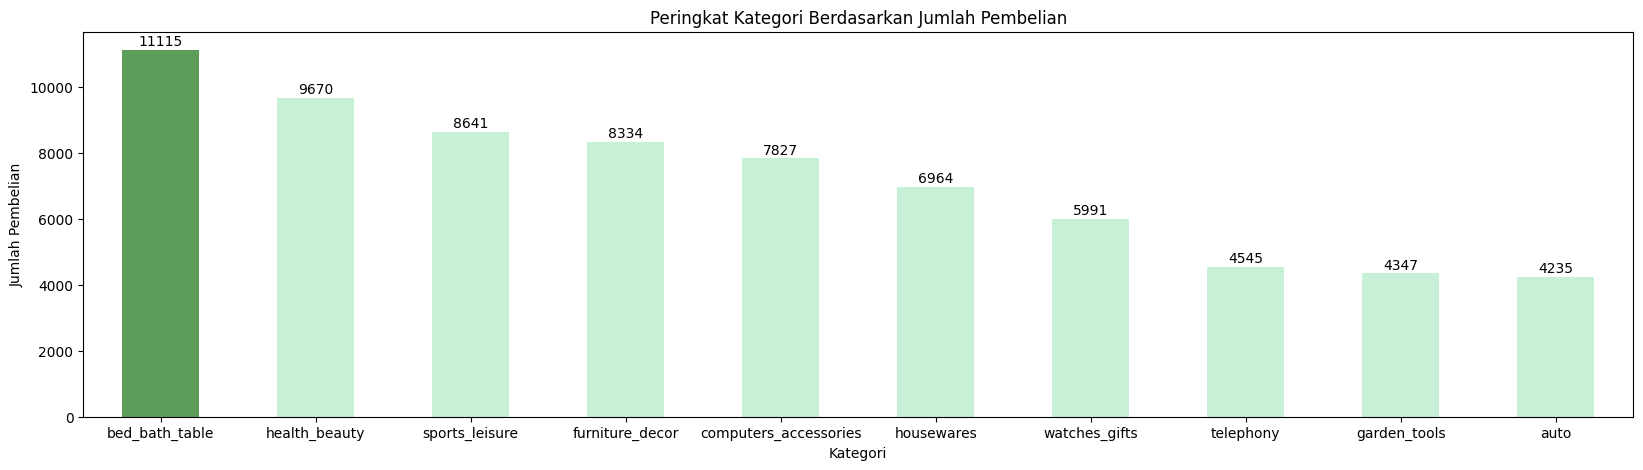

In [ ]:
plt.figure(figsize=(20,5))
cat_rank_top = cat_rank[0:10]
ax = cat_rank_top.plot(kind='bar',color=['#5d9c59','#C6F1D6','#C6F1D6','#C6F1D6','#C6F1D6','#C6F1D6','#C6F1D6','#C6F1D6','#C6F1D6','#C6F1D6'])
plt.title('Peringkat Kategori Berdasarkan Jumlah Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.xlabel('Kategori')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.show()

### Pertanyaan 4: Apakah terdapat hubungan antara berat produk dengan keterlambatan?

In [ ]:
plt.figure(figsize=(6,5))
bar_heights = [weight_late_delivered_mean, weight_notlate_delivered_mean]
bar_labels = ['Pengiriman Terlambat', 'Pengiriman Tidak Terlambat']
plt.bar(bar_labels, bar_heights, color=['#FF6347','#32CD32'])
plt.title('Perbandingan Rata-Rata Berat Produk')
plt.xlabel('Status Pengiriman')
plt.ylabel('Rata-Rata Berat Produk (gram)')
plt.ylim(0, max(bar_heights) + 200)
for i, height in enumerate(bar_heights):
  plt.text(i, height + 50, f'{height:.2f}', ha='center')
plt.show()

### Pertanyaan 5: Metode Pembayaran Apa Yang Paling Sering Digunakan Dan Menampilkan Jumlah Transaksi Paling Besar Disetiap Metode Transaksinya serta mengecek apakah ada Payment_Type yang tidak terdefinisikan
**(10121033-M.Irsyad.Hasbadi)**

Visualisasi Jumlah Payment_Type mana Yang Pernah Dan Paling Banyak Dilakukan Dan Apakah Ada Payment_Type Yang Tidak Terdefinisi

In [ ]:
percentages = round(payment_type_counts / payment_type_counts.sum() * 100, 1)
x = payment_type_counts.values.tolist()

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
fig, ax = plt.subplots()

wedges, _, _ = ax.pie(x, colors=colors, autopct='',
                      wedgeprops={"linewidth": 1, "edgecolor": "white"}, startangle=90)

labels = [f"{payment_type_counts.index[i]}: {percentages[i]}%" for i in range(len(payment_type_counts))]
plt.legend(wedges, labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.show()

Visualisasi Payment_Value Tertinggi Dari Masing Masing Peyment_Type

In [ ]:
# max_payment_per_type = data.groupby('payment_type')['payment_value'].max()
display(max_payment_per_type)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors
max_payment_per_type.plot(kind='bar', color=colors)
plt.xlabel('Metode Pembayaran')
plt.ylabel('Nilai Pembayaran Tertinggi')
plt.title('Nilai Pembayaran Tertinggi per Metode Pembayaran')

for i, value in enumerate(max_payment_per_type):
    plt.text(i, value, f' {value}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- Conclusion pertanyaan 1 <br/>
 1. Dari hasil visualisasi didapati bahwa **State of São Paulo** merupakan state dengan aktifitas transaksi terbanyak, dengan total sebanyak 3.878.927 (3 juta) transaksi. Langkah yang dapat dilakukan selanjutnya ialah dengan menjadikan state ini sebagai fokus pemasaran lebih mendalam. Karena state ini memiliki 40% aktifitas transaksi dari total 10.328.006 (10 juta) transaksi yang terjadi di Brazil.
 2. Analisis yang lebih mendalam menunjukan bahwa di antara kota-kota di **State of São Paulo**, kota **Sao Paulo** lah yang paling menonjol sebagai pusat utama aktifitas transaksi dengan total sebanyak 762.024 transaksi. Hal ini menunjukan bahwa 19,63% transaksi di **State of São Paulo** berasal dari kota **Sao Paulo**. Lalu di posisi selanjutnya terdapat kota **Santos** dengan total transaksi sebanyak 134.971 transaksi atau 3,48%.

- Conclusion pertanyaan 2 <br/>
Dari hasil analisis data yang telah dilakukan, didapatkan beberapa kesimpulan berikut:
  1. Persentase pengiriman yang terjadi keterlambatan adalah sebesar **6.77%** dari seluruh pemberian yang telah berhasil diterima oleh pelanggan.
  2. Dari analisis yang dilakukan, terlihat jelas bahwa keterlambatan pengiriman sangat berpengaruh terhadap *review* yang diberikan oleh pelanggan. Hal ini dapat dilihat dari nilai rata-rata skor *review* yang diberikan oleh pelanggan yang mengalami keterlambatan pengiriman, yaitu sebesar **2.27**, yang mana jauh lebih kecil dibandingkan yang diberikan oleh pelanggan yang tidak mengalami keterlambatan pengiriman, yaitu sebesar **4.29**.
  3. Distribusi skor *review* pelanggan yang mengalami keterlambatan pengiriman adalah sebagai berikut:
    - Skor 1 : 3444 pelanggan (53.74 %)
    - Skor 2 : 556 pelanggan (8.68 %)
    - Skor 3 : 697 pelanggan (10.88 %)
    - Skor 4 : 652 pelanggan (10.16 %)
    - Skor 5 : 1060 pelanggan (16.54 %)

- Conclusion pertanyaan 3 <br/>
Berdasarkan hasil analisis, dapat disimpulkan bahwa kategori produk yang paling banyak dibeli adalah `bed_bath_table`, `health_beauty`, dan `sports_leisure`. Ini menunjukkan bahwa konsumen cenderung membeli produk yang berhubungan dengan kebutuhan sehari-hari seperti perabotan rumah tangga dan produk kesehatan dan kecantikan. Selain itu, produk olahraga dan rekreasi juga cukup populer, menunjukkan minat konsumen dalam aktivitas fisik dan hobi luar ruangan. Dengan informasi ini, langkah selanjutnya perusahaan dapat fokus pada peningkatan stok dan variasi produk dalam kategori-kategori ini untuk memenuhi permintaan konsumen.

- Conslusion pertanyaan 4</br>
Berdasarkan analisis rata-rata yang telah dilakukan, terlihat bahwa terdapat perbedaan rata-rata berat produk antara pengiriman yang mengalami keterlambatan dengan yang tidak. Rata-rata berat produk pada pengiriman yang terlambat cenderung lebih tinggi dengan total 2471.68 dibandingkan dengan pengiriman yang tepat waktu atau tidak terlambat dengan total 2069.27, dapat diasumsikan bahwa adanya hubungan antara berat produk dengan keterlambatan pengiriman.
- Conslusion Pertanyaan 5
 1. Dari Hasil Perhitungan Terbukti Bahwa Sebanyak 73.9% Customer Memilih Payment Type Berupa Credit Card Dengan Jumlah Transaksi Sebanyak : 76795 Transaksi
 2. Terdapat 3 Payment Type Yang Tidak Terdefinisi Di Dalam Dataset
 3. Nilai Pyment Value Terbanyak Dari Masing Masing Payment Type Sebagai Berikut:
   - Boleto  : 7274.88
   - Credit Card : 13664.08
   - Voucher : 3184.34
   - Notdefined : 0.00
 4. Payment Value Tertinggi Yang Pernah Dilakukan Yaitu Menggunakan Credit Card Dengan Payment Value Sebanyak :13664.08